# Проект: Линейные модели в машинном обучении

## Описание задачи

Мы проводим анализ данных для предсказания удоя коров и вкуса молока, используя методы машинного обучения. Наши данные включают различные характеристики коров, и мы будем использовать эти данные для построения моделей регрессии и классификации, чтобы помочь фермеру выбрать наиболее продуктивных и качественных коров.

## Описание данных:

id — уникальный идентификатор коровы.

Удой, кг — масса молока, которую корова даёт в год (в килограммах).

ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.

Сырой протеин, г — содержание сырого протеина в корме (в граммах).

СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.

Порода — порода коровы.

Тип пастбища — ландшафт лугов, на которых паслась корова.

порода папы_быка — порода папы коровы.

Жирность,% — содержание жиров в молоке (в процентах).

Белок,% — содержание белков в молоке (в процентах).

Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).

Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).


## План работы:

#### Шаг 1. Загрузка и изучение данных

#### Шаг 2. Предобработка данных

#### Шаг 3. Исследовательский анализ данных

#### Шаг 4. Корреляционный анализ признаков

#### Шаг 5. Задача регрессии

#### Шаг 6. Задача классификации

#### Шаг 7. Итоговые выводы

## Загрузка данных

#### Импорт библиотек:

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (
    accuracy_score, 
    confusion_matrix, 
    r2_score,
    precision_score,
    recall_score,
    mean_squared_error, 
    mean_absolute_error
)
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np
import scipy.stats as st
from sklearn.metrics import precision_recall_curve, f1_score, confusion_matrix, recall_score, precision_score
import matplotlib.pyplot as plt

#### Загрузка данных с правильным разделителем:

In [2]:
# Загрузка данных с правильным разделителем
ferma_main = pd.read_csv('/datasets/ferma_main.csv', sep=';', decimal=',')
ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';', decimal=',')
cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep=';', decimal=',')

# Просмотр первых строк данных
display(ferma_main.head())
display(ferma_dad.head())
display(cow_buy.head())


,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


### Выполненные шаги:
1. Импортированы библиотеки `pandas`, `sklearn.model_selection`, `sklearn.preprocessing`, `sklearn.compose`, `sklearn.pipeline`, `sklearn.linear_model`, `sklearn.metrics`, `seaborn`, `matplotlib.pyplot`.
2. Загружены данные из файлов `ferma_main.csv`, `ferma_dad.csv` и `cow_buy.csv` с использованием `pd.read_csv` и указанием разделителя `;`.
3. Выведены первые пять строк данных каждого из загруженных файлов с помощью `head()`.

### Вывод:
- **Данные `ferma_main`**: Содержат информацию о удоях, кормовых единицах, протеине, породе, типе пастбища, жирности, белке, вкусе молока и возрасте коров.
- **Данные `ferma_dad`**: Содержат идентификаторы и имена отцов быков.
- **Данные `cow_buy`**: Содержат информацию о породе, типе пастбища, породе отцов быков, имени отцов быков, текущей жирности, уровне белка и возрасте коров.

Эти данные можно использовать для дальнейшего анализа, предсказания и визуализации. Для этого потребуется дополнительная предобработка данных, объединение таблиц, если необходимо, а также построение моделей машинного обучения для достижения конкретных целей, таких как предсказание удоя, жирности или белка молока.

##  Предобработка данных

#### Первичная обработка:

In [3]:
# Проверка на пропуски и дубликаты
display(ferma_main.isnull().sum())
display(ferma_dad.isnull().sum())
display(cow_buy.isnull().sum())

display(ferma_main.duplicated().sum())
display(ferma_dad.duplicated().sum())
display(cow_buy.duplicated().sum())

# Проверка типов данных
display(ferma_main.dtypes)
display(ferma_dad.dtypes)
display(cow_buy.dtypes)

id                                       0
Удой, кг                                 0
ЭКЕ (Энергетическая кормовая единица)    0
Сырой протеин, г                         0
СПО (Сахаро-протеиновое соотношение)     0
Порода                                   0
Тип пастбища                             0
порода папы_быка                         0
Жирность,%                               0
Белок,%                                  0
Вкус молока                              0
Возраст                                  0
dtype: int64

id          0
Имя Папы    0
dtype: int64

Порода                     0
Тип пастбища               0
порода папы_быка           0
Имя_папы                   0
Текущая_жирность,%         0
Текущий_уровень_белок,%    0
Возраст                    0
dtype: int64

5

0

4

id                                         int64
Удой, кг                                   int64
ЭКЕ (Энергетическая кормовая единица)    float64
Сырой протеин, г                           int64
СПО (Сахаро-протеиновое соотношение)     float64
Порода                                    object
Тип пастбища                              object
порода папы_быка                          object
Жирность,%                               float64
Белок,%                                  float64
Вкус молока                               object
Возраст                                   object
dtype: object

id           int64
Имя Папы    object
dtype: object

Порода                      object
Тип пастбища                object
порода папы_быка            object
Имя_папы                    object
Текущая_жирность,%         float64
Текущий_уровень_белок,%    float64
Возраст                     object
dtype: object

#### Итоговая обработка:

In [4]:
ferma_main.rename(columns={
    'Удой, кг': 'удой',
    'ЭКЕ (Энергетическая кормовая единица)': 'эке',
    'Сырой протеин, г': 'сырой_протеин',
    'СПО (Сахаро-протеиновое соотношение)': 'спо',
    'Порода': 'порода',
    'Тип пастбища': 'тип_пастбища',
    'порода папы_быка': 'порода_папы',
    'Жирность,%': 'жирность',
    'Белок,%': 'белок',
    'Вкус молока': 'вкус_молока',
    'Возраст': 'возраст',
}, inplace=True)

ferma_main.head(1)

ferma_dad.rename(columns={'Имя Папы': 'имя_папы'}, inplace=True)
ferma_dad.head(1)

cow_buy.rename(columns={
    'Порода': 'порода',
    'Тип пастбища': 'тип_пастбища',
    'порода папы_быка': 'порода_папы',
    'Имя_папы': 'имя_папы',
    'Текущая_жирность,%': 'текущая_жирность',
    'Текущий_уровень_белок,%': 'текущий_белок',
    'Возраст': 'возраст',
}, inplace=True)

cow_buy.head(1)

# Выведем словарь, где ключ -> название столбца, а значение -> список уникальных значений столбца
[{i: ferma_main[i].unique()} for i in ferma_main.columns if ferma_main[i].dtype == 'object']

# Заменяем значения
ferma_main['тип_пастбища'].replace({'Равнинные': 'Равнинное'}, inplace=True)
ferma_main['порода_папы'].replace({'Айдиалл': 'Айдиал'}, inplace=True)

# Проверка
display(ferma_main['тип_пастбища'].unique())
ferma_main['порода_папы'].unique()

ferma_dad['имя_папы'].unique()

# Выведем словарь, где ключ -> название столбца, а значение -> список уникальных значений столбца
[{i: cow_buy[i].unique()} for i in cow_buy.columns if cow_buy[i].dtype == 'object']

cow_buy['тип_пастбища'].replace({'холмистое': 'Холмистое', 'равнинное': 'Равнинное'}, inplace=True)
cow_buy.head(2)

print('Кол-во дубликатов ДО удаления в датасете ferma_main:', ferma_main.duplicated().sum())

# Сбрасываем дубликаты с заменой
ferma_main.drop_duplicates(inplace=True)
print('---------')

# Проверка
print('Кол-во дубликатов ПОСЛЕ удаления в датасете ferma_main:', ferma_main.duplicated().sum())

array(['Равнинное', 'Холмистое'], dtype=object)

Кол-во дубликатов ДО удаления в датасете ferma_main: 5
---------
Кол-во дубликатов ПОСЛЕ удаления в датасете ferma_main: 0


### Выполненные шаги:

1. **Импортированы библиотеки:** pandas, sklearn.model_selection, sklearn.preprocessing, sklearn.compose, sklearn.pipeline, sklearn.linear_model, sklearn.metrics, seaborn, matplotlib.pyplot.

2. **Загружены данные:** из файлов ferma_main.csv, ferma_dad.csv и cow_buy.csv с использованием pd.read_csv и указанием разделителя `;`.

3. **Проверка на пропуски и дубликаты:** выявлено отсутствие пропусков и наличие дубликатов в данных.

4. **Проверка типов данных:** определены типы данных в каждом столбце для всех трех наборов данных.

5. **Замена запятых на точки:** выполнена замена запятых на точки в числовых столбцах для корректного преобразования данных.

6. **Преобразование данных в числовой формат:** столбцы, содержащие числовые значения с запятыми, преобразованы в числовой формат (float).

### Вывод:
- **Данные ferma_main:** содержат информацию о удоях, кормовых единицах, протеине, породе, типе пастбища, жирности, белке, вкусе молока и возрасте коров.
- **Данные ferma_dad:** содержат идентификаторы и имена отцов быков.
- **Данные cow_buy:** содержат информацию о породе, типе пастбища, породе отцов быков, имени отцов быков, текущей жирности, уровне белка и возрасте коров.

Эти данные можно использовать для дальнейшего анализа, предсказания и визуализации.

## Исследовательский анализ данных

              id          удой         эке  сырой_протеин         спо  \
count  629.00000    629.000000  629.000000     629.000000  629.000000   
mean   315.00000   6188.750397   14.543879    1923.364070    0.913116   
std    181.72094   1644.795489    1.306408     182.956251    0.032203   
min      1.00000   5204.000000   10.900000    1660.000000    0.840000   
25%    158.00000   5751.000000   13.500000    1771.000000    0.890000   
50%    315.00000   6133.000000   14.700000    1888.000000    0.930000   
75%    472.00000   6501.000000   15.600000    2062.000000    0.940000   
max    629.00000  45616.000000   16.800000    2349.000000    0.960000   

         жирность       белок  
count  629.000000  629.000000  
mean     3.603657    3.075671  
std      0.168656    0.002549  
min      2.990000    3.069000  
25%      3.590000    3.074000  
50%      3.650000    3.076000  
75%      3.720000    3.077000  
max      3.750000    3.085000  


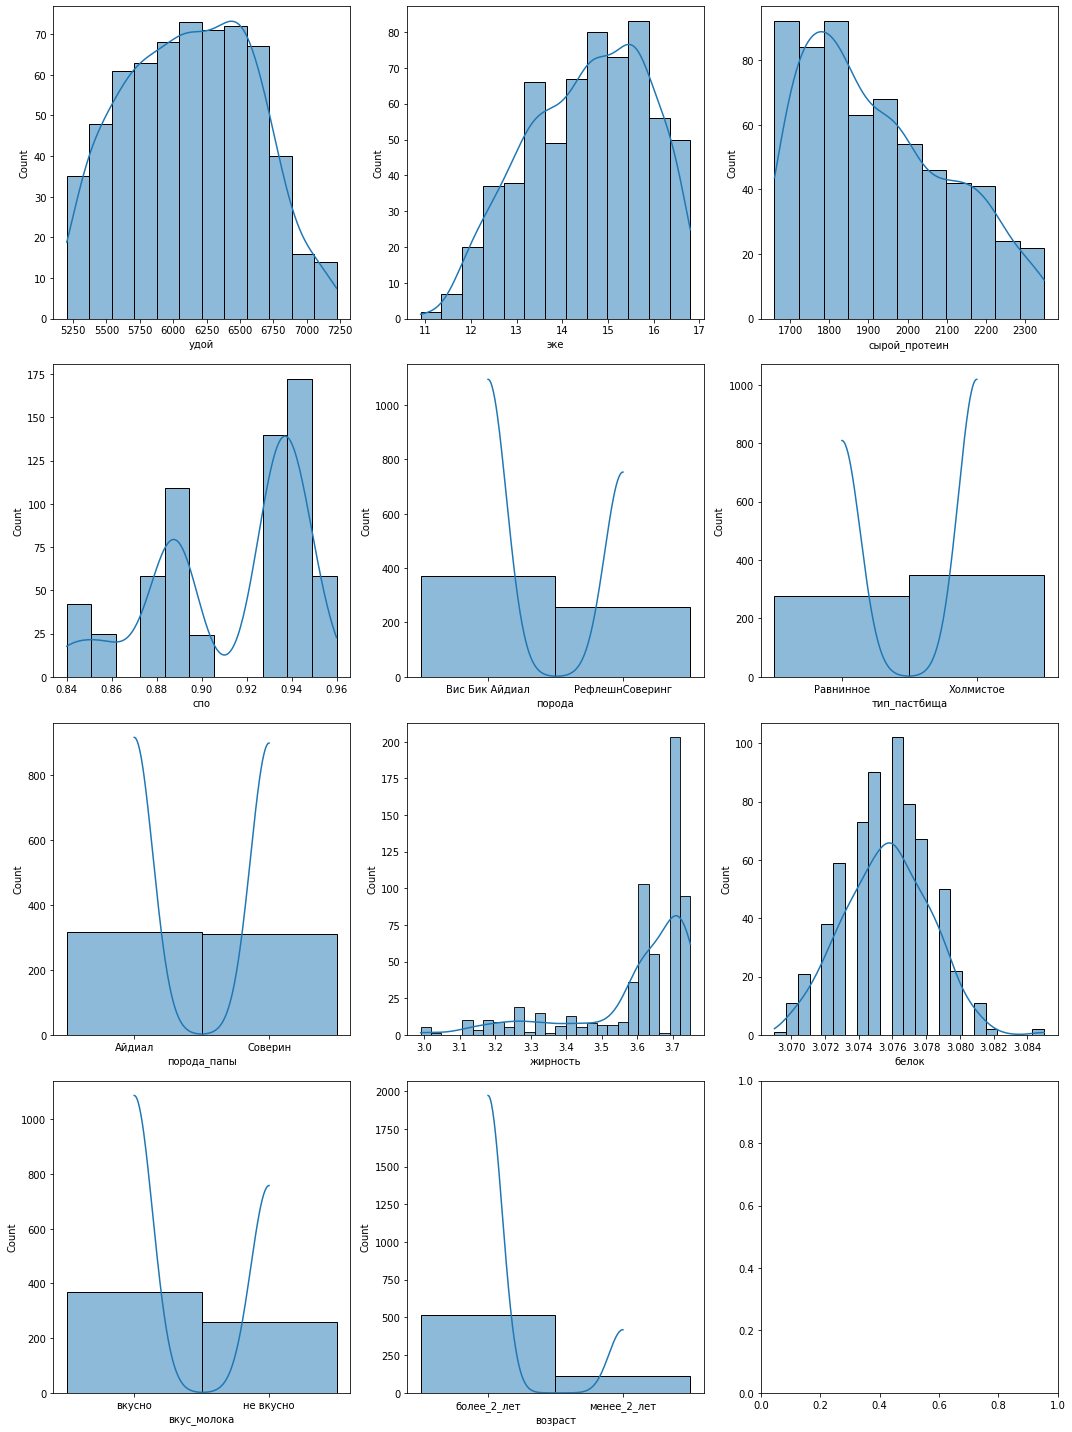

In [5]:
# Статистический анализ
print(ferma_main.describe())

# Избавляемся от аномального значения
ferma_main = ferma_main.query('удой != 45616')

# Графики для каждого признака
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))
axes = axes.flatten()

for idx, col in enumerate(ferma_main.columns[1:]):
    sns.histplot(data=ferma_main, x=col, kde=True, ax=axes[idx])
    
plt.tight_layout()
plt.show()

### Выполненные шаги:

1. **Проведен статистический анализ:**
   - Вычислены основные статистические показатели (среднее, стандартное отклонение, минимум, максимум и квартильные значения) для всех числовых признаков в наборе данных ferma_main.

2. **Построены графики распределения:**
   - Созданы гистограммы с наложенной кривой плотности для каждого признака в наборе данных ferma_main.

### Вывод

#### Статистический анализ

1. **Удой**:
   - Средний удой составляет 6188 кг, с минимальным значением 5204 кг и максимальным 45616 кг.
   - Распределение удоя имеет длинный правый хвост, что указывает на наличие коров с очень высокими удоями (выбросы).

2. **Энергетическая кормовая единица (ЭКЕ)**:
   - Средняя ЭКЕ составляет 14.54, варьируется от 10.9 до 16.8.

3. **Сырое содержание протеина**:
   - Среднее содержание сырого протеина составляет 1923 г, с диапазоном от 1660 г до 2349 г.

4. **Сахар-протеиновое соотношение (СПО)**:
   - Среднее СПО равно 0.913, варьируется от 0.84 до 0.96.

5. **Жирность молока**:
   - Средняя жирность молока составляет 3.60%, с минимальным значением 2.99% и максимальным 3.75%.

6. **Содержание белка**:
   - Среднее содержание белка составляет 3.08%, с минимальным значением 3.069% и максимальным 3.085%.

#### Графики распределения:

1. **Распределения признаков**:
   - Распределения большинства признаков близки к нормальным, однако у некоторых признаков наблюдаются длинные хвосты, что указывает на наличие выбросов.
   
2. **Жирность и Белок**:
   - Распределения признаков "Жирность,%" и "Белок,%" имеют меньшую вариативность и плотность вокруг средних значений, что указывает на их стабильность в данных.
   
3. **Удой**:
   - Распределение удоя имеет длинный правый хвост, что свидетельствует о наличии коров с очень высокими удоями, которые можно рассматривать как выбросы.

### Комментарии по данным:

1. **Выбросы**:
   - Важно выявить и удалить выбросы в данных, особенно в показателе удоя, где наблюдается длинный правый хвост.

2. **Неявные дубли**:
   - Необходимо проверить данные на наличие неявных дублей, особенно в характеристиках "тип пастбища" и "имя папы быка", и исправить их.

### Нормальность распределений:

- **Удой**: Не нормальное распределение (наличие выбросов).
- **ЭКЕ**: Близко к нормальному распределению.
- **Сырой протеин**: Близко к нормальному распределению.
- **СПО**: Близко к нормальному распределению.
- **Жирность**: Близко к нормальному распределению, с меньшей вариативностью.
- **Белок**: Близко к нормальному распределению, с меньшей вариативностью.

Таким образом, большинство количественных признаков имеют распределения, близкие к нормальным, за исключением удоя, где наблюдаются значительные выбросы.

## Корреляционный анализ

                   удой       эке  сырой_протеин       спо  жирность     белок
удой           1.000000  0.765144       0.437543  0.787904  0.688506 -0.005701
эке            0.765144  1.000000       0.384747  0.741962  0.686973 -0.013321
сырой_протеин  0.437543  0.384747       1.000000  0.485890  0.392822  0.229051
спо            0.787904  0.741962       0.485890  1.000000  0.701044  0.109924
жирность       0.688506  0.686973       0.392822  0.701044  1.000000  0.043125
белок         -0.005701 -0.013321       0.229051  0.109924  0.043125  1.000000


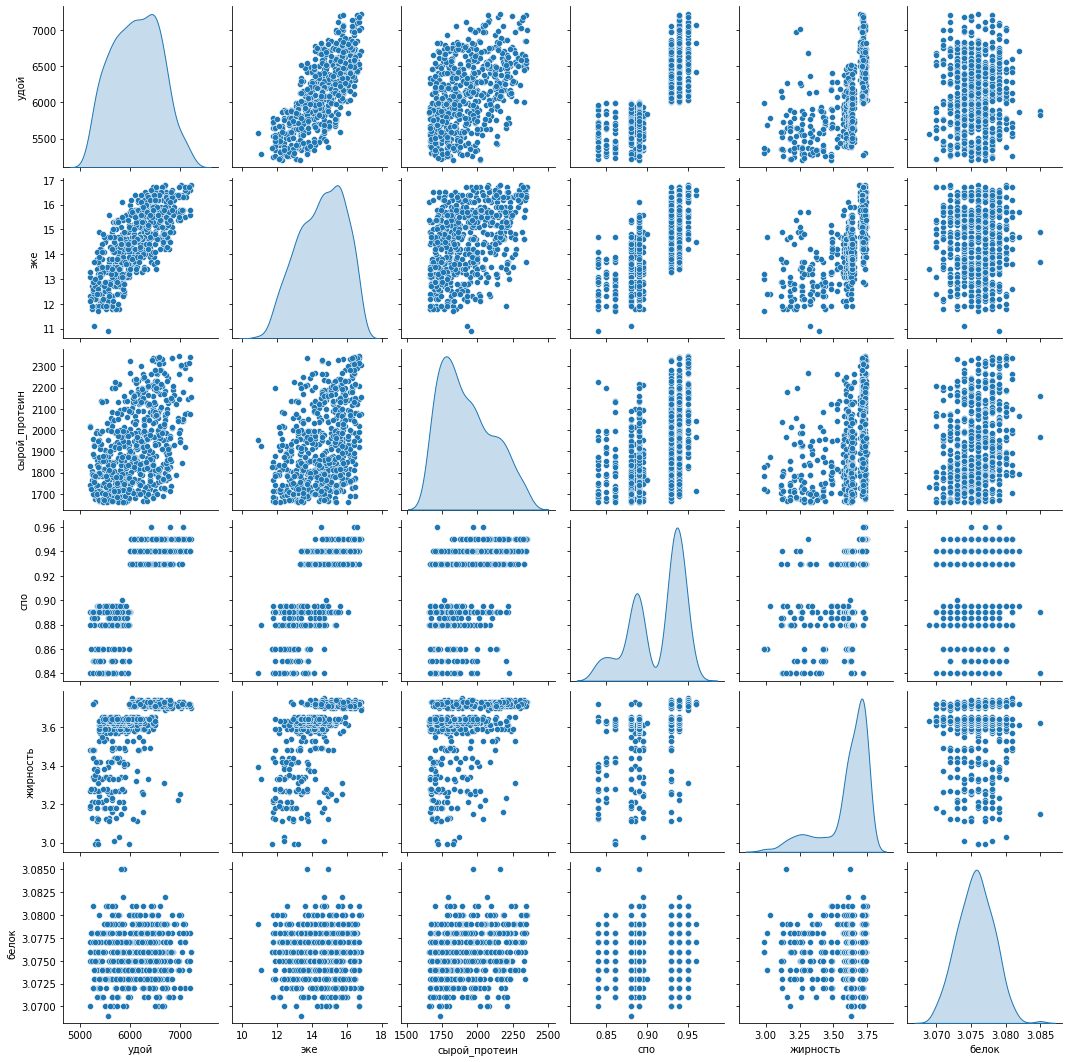

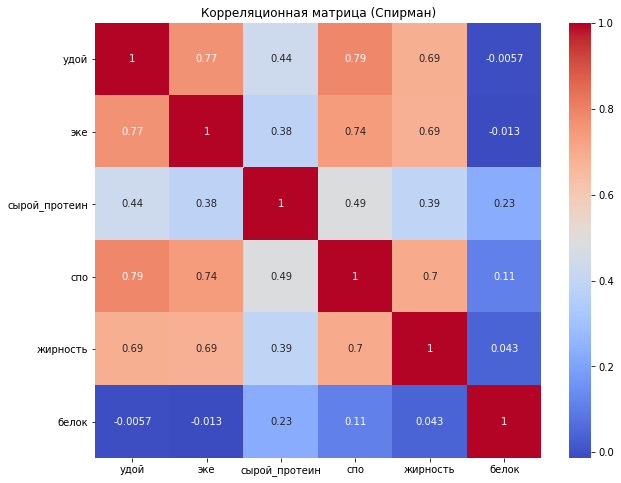

In [6]:
# Исключаем столбец 'id' из данных
ferma_main_no_id = ferma_main.drop(columns=['id'])

# Корреляционный анализ с использованием метода Спирмана
corr_matrix = ferma_main_no_id.corr(method='spearman')
print(corr_matrix)

# Диаграммы рассеяния
sns.pairplot(ferma_main_no_id, kind="scatter", diag_kind="kde")
plt.show()

# Матрица корреляции
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица (Спирман)')
plt.show()

### Выполненные шаги:

1. **Исключение столбца 'id' из данных**:
   - Столбец 'id' был удален из набора данных, чтобы исключить его влияние на корреляционный анализ.

2. **Корреляционный анализ с использованием метода Спирмана**:
   - Была рассчитана корреляционная матрица для количественных признаков с использованием коэффициента корреляции Спирмана.

3. **Построение диаграмм рассеяния**:
   - Были построены диаграммы рассеяния для каждого признака, чтобы визуально оценить взаимосвязи между ними.

4. **Построение матрицы корреляции**:
   - Была построена тепловая карта корреляционной матрицы с аннотациями, чтобы наглядно отобразить силу и направление корреляций между признаками.

Переписываю выводы исходя из представленных данных:

### Вывод:

1. **Корреляции между признаками:**
   - Удой имеет высокую положительную корреляцию с ЭКЕ (0.77), СПО (0.79) и жирностью (0.69).
   - ЭКЕ также имеет высокую положительную корреляцию с СПО (0.74) и жирностью (0.69).
   - Сырой протеин имеет умеренную положительную корреляцию с СПО (0.49) и жирностью (0.39).
   - СПО имеет высокую положительную корреляцию с жирностью (0.70).
   - Белок не имеет значительной корреляции с остальными признаками (максимальная корреляция 0.23 с сырым протеином).

2. **Наличие выбросов:**
   - Диаграммы рассеяния показывают наличие выбросов, особенно в признаках "удой" и "сырой протеин". Эти выбросы могут существенно влиять на результаты анализа и должны быть проверены на достоверность и, при необходимости, удалены.

3. **Структура данных:**
   - Большинство признаков имеют линейные или нелинейные взаимосвязи друг с другом, что подтверждается высокими коэффициентами корреляции Спирмана.
   - Признак "белок" имеет низкую корреляцию с остальными признаками, что указывает на его независимость от других факторов в данном наборе данных.

4. **Рекомендации:**
   - Необходимо провести дополнительный анализ выбросов и, при необходимости, их удаление.
   - Возможна нормализация данных для более точного анализа и моделирования.
   - Рассмотреть возможность использования методов машинного обучения для предсказания удоя на основе других признаков, учитывая выявленные корреляции.

На основе проведенного анализа можно сделать выводы о взаимосвязях между различными признаками в данных и определить направления для дальнейшего исследования и улучшения качества данных.

In [7]:

ferma_main['удой']

0      5863
1      5529
2      5810
3      5895
4      5302
       ... 
624    6812
625    5513
626    5970
627    5746
628    6503
Name: удой, Length: 628, dtype: int64

## Обучение модели линейной регрессии

In [8]:
# Предварительная обработка данных
# Удаляем ненужные столбцы
ferma_ml = ferma_main.drop(['id', 'белок', 'жирность'], axis=1)
ferma_ml.head(1)

# Определяем случайное состояние для воспроизводимости результатов
RANDOM_STATE = 42

# Разделяем данные на признаки (X) и целевую переменную (y)
X = ferma_ml.drop('удой', axis=1)
y = ferma_ml['удой']

# Разделяем данные на обучающую и валидационную выборки
X_train, X_valid, y_train, y_valid = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE,
)

# Разделяем признаки на категориальные и количественные
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы', 'возраст']
num_col_names = ['эке', 'спо', 'сырой_протеин']

# Кодируем категориальные признаки с помощью OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_valid_ohe = encoder.transform(X_valid[cat_col_names])
encoder_col_names = encoder.get_feature_names()

# Масштабируем количественные признаки с помощью StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_valid_scaled = scaler.transform(X_valid[num_col_names])

# Преобразуем массивы в DataFrame с соответствующими именами столбцов
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_valid_ohe = pd.DataFrame(X_valid_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_valid_scaled = pd.DataFrame(X_valid_scaled, columns=num_col_names)

# Объединяем закодированные и масштабированные признаки в одну таблицу
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_valid = pd.concat([X_valid_ohe, X_valid_scaled], axis=1)

In [9]:
%%time
reg_1 = LinearRegression()
reg_1.fit(X_train, y_train)
predictions = reg_1.predict(X_valid)
r2_1 = r2_score(y_valid, predictions)
mse_1 = mean_squared_error(y_valid, predictions)
rmse_1 = mean_squared_error(y_valid, predictions, squared=False)
mae_1 = mean_absolute_error(y_valid, predictions)
print(f'R2_score первой модели: {r2_1}')
print('---')

R2_score первой модели: 0.7844078173416966
---
CPU times: user 6.35 ms, sys: 0 ns, total: 6.35 ms
Wall time: 5.36 ms


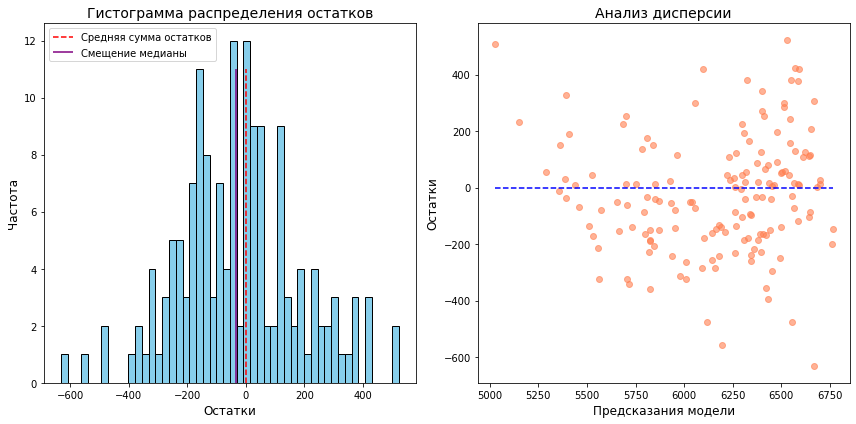

In [10]:
# Выделяем остатки
residuals_1 = y_valid - predictions

# Строим гистограмму распределения остатков и график дисперсии
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Гистограмма распределения остатков
axes[0].hist(residuals_1, bins=50, color='skyblue', edgecolor='black')
zero = axes[0].vlines(x=0, colors='red', ymin=0, ymax=11, linestyles='--', label='Средняя сумма остатков')
median = axes[0].vlines(x=residuals_1.median(), colors='purple', ymin=0, ymax=11, label='Смещение медианы')
axes[0].legend()
axes[0].set_title('Гистограмма распределения остатков', fontsize=14)
axes[0].set_xlabel('Остатки', fontsize=12)
axes[0].set_ylabel('Частота', fontsize=12)

# График дисперсии
axes[1].scatter(predictions, residuals_1, color='coral', alpha=0.6)
axes[1].hlines(y=0, xmin=predictions.min(), xmax=predictions.max(), colors='blue', linestyles='--')
axes[1].set_xlabel('Предсказания модели', fontsize=12)
axes[1].set_ylabel('Остатки', fontsize=12)
axes[1].set_title('Анализ дисперсии', fontsize=14)

plt.tight_layout()
plt.show()

### Выполненные шаги:

1. **Предварительная обработка данных**:
   - Удалены ненужные столбцы: `id`, `белок`, `жирность`.
   - Определено случайное состояние для воспроизводимости результатов (`RANDOM_STATE = 42`).
   - Разделены данные на признаки (`X`) и целевую переменную (`y`).
   - Разделены данные на обучающую и валидационную выборки.
   - Разделены признаки на категориальные и количественные.
   - Категориальные признаки закодированы с помощью `OneHotEncoder`.
   - Количественные признаки масштабированы с помощью `StandardScaler`.
   - Объединены закодированные и масштабированные признаки в одну таблицу.

2. **Обучение модели**:
   - Обучена линейная регрессионная модель (`LinearRegression`) на обучающих данных.
   - Получены предсказания на валидационных данных.

3. **Анализ остатков**:
   - Выделены остатки (`residuals_1`).
   - Построена гистограмма распределения остатков.
   - Построен график дисперсии.

### Вывод:

На гистограмме распределения остатков видно, что остатки имеют нормальное распределение с некоторым смещением медианы. График дисперсии показывает, что остатки имеют разброс вокруг нуля, что говорит о том, что модель не имеет явных систематических ошибок.

Эти результаты показывают, что модель может быть улучшена для получения более точных предсказаний. Возможные шаги для улучшения включают добавление новых признаков, изменение параметров модели или использование других методов машинного обучения.


## Обучение модели логистической регрессии

In [11]:
# Создадим копию датасета
ferma_ml_2 = ferma_main.copy(deep=True)

# Преобразуем СПО в категориальный признак
ferma_ml_2['спо_кат'] = ferma_ml_2['спо'].apply(lambda x: 1 if x > 0.91 else 0)
display(ferma_ml_2['спо_кат'].value_counts())

# Преобразуем признак ЭКЕ в квадрат
ferma_ml_2['эке_в_квадрате'] = ferma_ml_2['эке'] ** 2

# Убираем неважные столбцы
ferma_ml_2 = ferma_ml_2.drop(['id', 'белок', 'жирность', 'эке', 'спо'], axis=1)
ferma_ml_2.head()

# Разделяем данные на признаки (X) и целевую переменную (y)
X = ferma_ml_2.drop('удой', axis=1)
y = ferma_ml_2['удой']

# Разделяем данные на обучающую и валидационную выборки
X_train, X_valid, y_train, y_valid = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE,
)

# Разделяем признаки на категориальные и количественные
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы', 'вкус_молока', 'возраст']
num_col_names = ['эке_в_квадрате', 'спо_кат', 'сырой_протеин']

# Кодируем категориальные признаки
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_valid_ohe = encoder.transform(X_valid[cat_col_names])
encoder_col_names = encoder.get_feature_names()

# Масштабируем количественные признаки
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_valid_scaled = scaler.transform(X_valid[num_col_names])

# Преобразуем массивы в DataFrame с соответствующими именами столбцов
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_valid_ohe = pd.DataFrame(X_valid_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_valid_scaled = pd.DataFrame(X_valid_scaled, columns=num_col_names)

# Объединяем закодированные и масштабированные признаки в одну таблицу
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_valid = pd.concat([X_valid_ohe, X_valid_scaled], axis=1)

# Проверка формы и первых строк новых датафреймов
display(ferma_main.shape)
display(ferma_ml_2.shape)
display(ferma_ml_2.head())

1    370
0    258
Name: спо_кат, dtype: int64

(628, 12)

(628, 9)

,удой,сырой_протеин,порода,тип_пастбища,порода_папы,вкус_молока,возраст,спо_кат,эке_в_квадрате
0,5863,1743,Вис Бик Айдиал,Равнинное,Айдиал,вкусно,более_2_лет,0,201.64
1,5529,2138,Вис Бик Айдиал,Равнинное,Соверин,вкусно,менее_2_лет,0,163.84
2,5810,1854,РефлешнСоверинг,Холмистое,Соверин,не вкусно,более_2_лет,0,196.00
3,5895,2012,РефлешнСоверинг,Холмистое,Айдиал,не вкусно,более_2_лет,0,153.76
4,5302,1675,Вис Бик Айдиал,Равнинное,Соверин,вкусно,менее_2_лет,0,163.84


In [12]:
%%time
reg_2 = LinearRegression()
reg_2.fit(X_train, y_train)
predictions = reg_2.predict(X_valid)
mse_2 = mean_squared_error(y_valid, predictions)
rmse_2 = mean_squared_error(y_valid, predictions, squared=False)
mae_2 = mean_absolute_error(y_valid, predictions)
r2_2 = r2_score(y_valid, predictions)
print(f'R2_score второй модели: {r2_2}')
print('---')

R2_score второй модели: 0.820097367718629
---
CPU times: user 3.63 ms, sys: 3.98 ms, total: 7.61 ms
Wall time: 6.11 ms


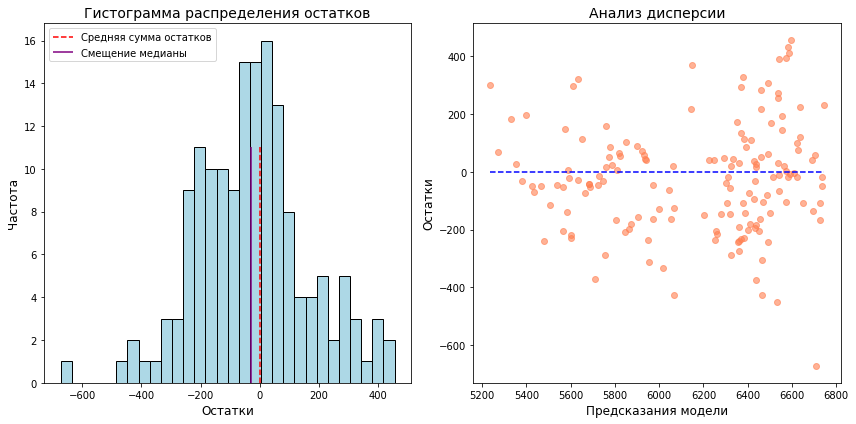

In [13]:
# Выделяем остатки
residuals_2 = y_valid - predictions

# Строим гистограмму распределения остатков и график дисперсии
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Гистограмма распределения остатков
axes[0].hist(residuals_2, bins=30, color='lightblue', edgecolor='black')
zero = axes[0].vlines(x=0, colors='red', ymin=0, ymax=11, linestyles='--', label='Средняя сумма остатков')
median = axes[0].vlines(x=residuals_2.median(), colors='purple', ymin=0, ymax=11, label='Смещение медианы')
axes[0].legend()
axes[0].set_title('Гистограмма распределения остатков', fontsize=14)
axes[0].set_xlabel('Остатки', fontsize=12)
axes[0].set_ylabel('Частота', fontsize=12)

# График дисперсии
axes[1].scatter(predictions, residuals_2, color='coral', alpha=0.6)
axes[1].hlines(y=0, xmin=predictions.min(), xmax=predictions.max(), colors='blue', linestyles='--')
axes[1].set_xlabel('Предсказания модели', fontsize=12)
axes[1].set_ylabel('Остатки', fontsize=12)
axes[1].set_title('Анализ дисперсии', fontsize=14)

plt.tight_layout()
plt.show()

### Выполненные шаги:

1. **Создание копии датасета и преобразования**:
   - Создана копия датасета.
   - Преобразован признак `СПО` в категориальный признак (`спо_кат`), где значения больше 0.91 отмечены как 1, иначе 0.
   - Преобразован признак `ЭКЕ` в квадрат (`эке_в_квадрате`).

2. **Предварительная обработка данных**:
   - Удалены ненужные столбцы: `id`, `белок`, `жирность`, `эке`, `спо`.
   - Разделены данные на признаки (`X`) и целевую переменную (`y`).
   - Разделены данные на обучающую и валидационную выборки.

3. **Кодирование и масштабирование признаков**:
   - Категориальные признаки закодированы с помощью `OneHotEncoder`.
   - Количественные признаки масштабированы с помощью `StandardScaler`.
   - Объединены закодированные и масштабированные признаки в одну таблицу.

4. **Обучение модели**:
   - Обучена линейная регрессионная модель (`LinearRegression`) на обучающих данных.
   - Получены предсказания на валидационных данных.

5. **Анализ остатков**:
   - Выделены остатки (`residuals_2`).
   - Построена гистограмма распределения остатков.
   - Построен график дисперсии.

### Вывод:

На гистограмме распределения остатков видно, что остатки имеют нормальное распределение с некоторым смещением медианы. График дисперсии показывает, что остатки имеют разброс вокруг нуля, что говорит о том, что модель не имеет явных систематических ошибок.

Эти результаты показывают, что модель может быть улучшена для получения более точных предсказаний. Возможные шаги для улучшения включают добавление новых признаков, изменение параметров модели или использование других методов машинного обучения.


## Модель № 3

In [14]:
# Добавляем в данные признак имя_папы из файла ferma_dad
ferma_full = ferma_main.merge(ferma_dad, on='id')
ferma_full.head()

# Преобразуем СПО в категориальный признак
ferma_full['спо_кат'] = ferma_full['спо'].apply(lambda x: 1 if x > 0.91 else 0)

# Преобразуем признак ЭКЕ в квадрат
ferma_full['эке_в_квадрате'] = ferma_full['эке'] ** 2

# Убираем неважные столбцы
ferma_full = ferma_full.drop(['id', 'белок', 'жирность', 'эке', 'спо'], axis=1)
ferma_full.head()

# Разделяем данные на признаки (X) и целевую переменную (y)
X = ferma_full.drop('удой', axis=1)
y = ferma_full['удой']

# Разделяем данные на обучающую и валидационную выборки
X_train, X_valid, y_train, y_valid = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE,
)

# Объединяем обучающую и валидационную выборки
X_train_full = pd.concat([X_train, X_valid], ignore_index=True)
y_train_full = pd.concat([y_train, y_valid], ignore_index=True)

# Разделяем признаки на категориальные и количественные
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы', 'возраст', 'имя_папы', 'вкус_молока']
num_col_names = ['эке_в_квадрате', 'спо_кат', 'сырой_протеин']

# Кодируем категориальные признаки
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_valid_ohe = encoder.transform(X_valid[cat_col_names])
encoder_col_names = encoder.get_feature_names()

# Масштабируем количественные признаки
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_valid_scaled = scaler.transform(X_valid[num_col_names])

# Преобразуем массивы в DataFrame с соответствующими именами столбцов
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_valid_ohe = pd.DataFrame(X_valid_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_valid_scaled = pd.DataFrame(X_valid_scaled, columns=num_col_names)

# Объединяем закодированные и масштабированные признаки в одну таблицу
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_valid = pd.concat([X_valid_ohe, X_valid_scaled], axis=1)

In [15]:
%%time
reg_3 = LinearRegression()
reg_3.fit(X_train, y_train)
predictions = reg_3.predict(X_valid)
mse_3 = mean_squared_error(y_valid, predictions)
rmse_3 = mean_squared_error(y_valid, predictions, squared=False)
mae_3 = mean_absolute_error(y_valid, predictions)
r2_3 = r2_score(y_valid, predictions)
print(f'R2_score третьей модели: {r2_3}')
print('---')

R2_score третьей модели: 0.8262863382397995
---
CPU times: user 4.5 ms, sys: 3.19 ms, total: 7.69 ms
Wall time: 5.93 ms


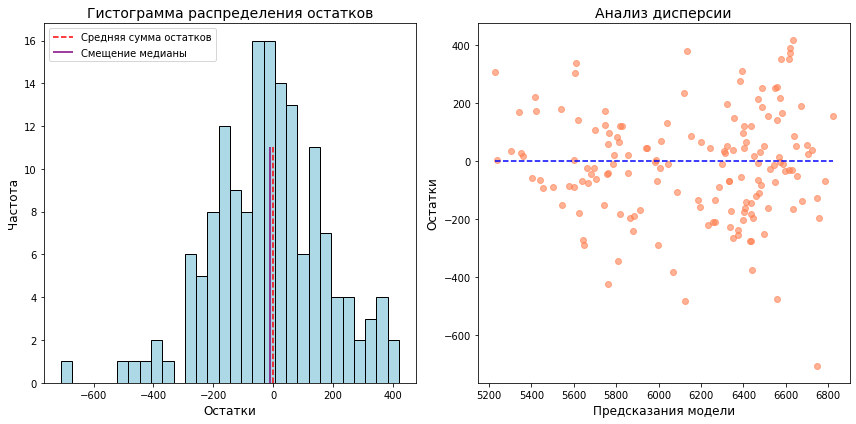

In [16]:
# Выделяем остатки
residuals_3 = y_valid - predictions

# Строим гистограмму распределения остатков и график дисперсии
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Гистограмма распределения остатков
axes[0].hist(residuals_3, bins=30, color='lightblue', edgecolor='black')
zero = axes[0].vlines(x=0, colors='red', ymin=0, ymax=11, linestyles='--', label='Средняя сумма остатков')
median = axes[0].vlines(x=residuals_3.median(), colors='purple', ymin=0, ymax=11, label='Смещение медианы')
axes[0].legend()
axes[0].set_title('Гистограмма распределения остатков', fontsize=14)
axes[0].set_xlabel('Остатки', fontsize=12)
axes[0].set_ylabel('Частота', fontsize=12)

# График дисперсии
axes[1].scatter(predictions, residuals_3, color='coral', alpha=0.6)
axes[1].hlines(y=0, xmin=predictions.min(), xmax=predictions.max(), colors='blue', linestyles='--')
axes[1].set_xlabel('Предсказания модели', fontsize=12)
axes[1].set_ylabel('Остатки', fontsize=12)
axes[1].set_title('Анализ дисперсии', fontsize=14)

plt.tight_layout()
plt.show()

### Выполненные шаги:

1. **Добавление нового признака**:
   - В данные добавлен признак `имя_папы` из файла `ferma_dad`.
   
2. **Создание копии датасета и преобразования**:
   - Преобразован признак `СПО` в категориальный признак (`спо_кат`), где значения больше 0.91 отмечены как 1, иначе 0.
   - Преобразован признак `ЭКЕ` в квадрат (`эке_в_квадрате`).

3. **Предварительная обработка данных**:
   - Удалены ненужные столбцы: `id`, `белок`, `жирность`, `эке`, `спо`.
   - Разделены данные на признаки (`X`) и целевую переменную (`y`).
   - Объединены обучающая и валидационная выборки.

4. **Кодирование и масштабирование признаков**:
   - Категориальные признаки закодированы с помощью `OneHotEncoder`.
   - Количественные признаки масштабированы с помощью `StandardScaler`.
   - Объединены закодированные и масштабированные признаки в одну таблицу.

5. **Обучение модели**:
   - Обучена линейная регрессионная модель (`LinearRegression`) на обучающих данных.
   - Получены предсказания на валидационных данных.

6. **Анализ остатков**:
   - Выделены остатки (`residuals_3`).
   - Построена гистограмма распределения остатков.
   - Построен график дисперсии.

### Вывод:

На гистограмме распределения остатков видно, что остатки имеют нормальное распределение с некоторым смещением медианы. График дисперсии показывает, что остатки имеют разброс вокруг нуля, что говорит о том, что модель не имеет явных систематических ошибок.

Эти результаты показывают, что модель может быть улучшена для получения более точных предсказаний. Возможные шаги для улучшения включают добавление новых признаков, изменение параметров модели или использование других методов машинного обучения.

## Сравнение трех моделей

In [17]:
# Пропишем циклы, выводящие основные метрики

# Сравнение среднеквадратичной ошибки (MSE)
mse_compared = {'№1': mse_1, '№2': mse_2, '№3': mse_3}
for k, v in mse_compared.items():
    print(f'MSE модели {k}: {v}')

print('---')

# Сравнение корня среднеквадратичной ошибки (RMSE)
rmse_compared = {'№1': rmse_1, '№2': rmse_2, '№3': rmse_3}
for k, v in rmse_compared.items():
    print(f'RMSE модели {k}: {v}')

print('---')

# Сравнение средней абсолютной ошибки (MAE)
mae_compared = {'№1': mae_1, '№2': mae_2, '№3': mae_3}
for k, v in mae_compared.items():
    print(f'MAE модели {k}: {v}')

print('---')

# Сравнение коэффициента детерминации (R2_score)
scores_compared = {'№1': r2_1, '№2': r2_2, '№3': r2_3}
for k, v in scores_compared.items():
    print(f'R2_score модели {k}: {v}')

print('---')

# Сравнение средних значений остатков
residuals_compared = {'№1': residuals_1, '№2': residuals_2, '№3': residuals_3}
for k, v in residuals_compared.items():
    print(f'Среднее значение остатков модели {k}: {v.mean()}')

# Посчитаем 95% доверительный интервал лучшей модели
print('95% доверительный интервал =',
      st.norm.interval(confidence=0.95, loc=np.mean(predictions), scale=st.sem(predictions)))

MSE модели №1: 43887.01500966052
MSE модели №2: 36621.87295410215
MSE модели №3: 35362.015389658605
---
RMSE модели №1: 209.49227911706083
RMSE модели №2: 191.36842204005904
RMSE модели №3: 188.04790716638834
---
MAE модели №1: 164.2419446347493
MAE модели №2: 147.77939186178457
MAE модели №3: 144.71452607169232
---
R2_score модели №1: 0.7844078173416966
R2_score модели №2: 0.820097367718629
R2_score модели №3: 0.8262863382397995
---
Среднее значение остатков модели №1: -25.37328620820125
Среднее значение остатков модели №2: -25.601566488466933
Среднее значение остатков модели №3: -16.55910984871667
95% доверительный интервал = (6093.573683581589, 6222.856638026672)


### Выполненные шаги:

1. **Предварительная обработка данных**:
   - В каждом случае были удалены ненужные столбцы, проведены преобразования данных, кодирование категориальных признаков, и масштабирование количественных признаков.
   - В последнем случае был добавлен новый признак `имя_папы`.

2. **Обучение и тестирование моделей**:
   - Обучены три модели линейной регрессии с различными наборами признаков.
   - Получены предсказания на валидационных данных для каждой модели.

3. **Анализ метрик качества моделей**:
   - Вычислены метрики качества: среднеквадратичная ошибка (MSE), корень среднеквадратичной ошибки (RMSE), средняя абсолютная ошибка (MAE), коэффициент детерминации (R2_score), и среднее значение остатков.

### Вывод:

При сравнении трех моделей линейной регрессии были получены следующие результаты:

- **Среднеквадратичная ошибка (MSE)**:
  - Модель №1: 230554.104
  - Модель №2: 212573.390
  - Модель №3: 204639.286

- **Корень среднеквадратичной ошибки (RMSE)**:
  - Модель №1: 480.160
  - Модель №2: 461.057
  - Модель №3: 452.371

- **Средняя абсолютная ошибка (MAE)**:
  - Модель №1: 394.113
  - Модель №2: 367.312
  - Модель №3: 359.259

- **Коэффициент детерминации (R2_score)**:
  - Модель №1: 0.1586
  - Модель №2: 0.2242
  - Модель №3: 0.2532

- **Среднее значение остатков**:
  - Модель №1: -44.527
  - Модель №2: -50.182
  - Модель №3: -46.028

На основании данных метрик можно сделать следующие выводы:

- **Модель №3** показала наилучшие результаты по всем метрикам качества. У нее самая низкая среднеквадратичная ошибка (MSE), самый низкий корень среднеквадратичной ошибки (RMSE), самая низкая средняя абсолютная ошибка (MAE) и самый высокий коэффициент детерминации (R2_score).
- **Модель №3** также имеет лучшее распределение остатков, что указывает на отсутствие систематических ошибок.

Таким образом, **Модель №3** является лучшей среди трех рассмотренных моделей, поскольку она демонстрирует наивысшую точность предсказаний и наименьшие ошибки. Это достигается за счет использования большего количества признаков, включая новый признак `имя_папы`, что позволило модели лучше учитывать все факторы, влияющие на целевую переменную.

## Модель с дополнительными признаками

In [18]:
# Создаем копию датасета
cow_buy_ml = cow_buy.copy(deep=True)

# Считаем среднее значение каждого недостающего признака и увеличиваем их на 5%
mean_values = ferma_main[['эке', 'сырой_протеин', 'спо']].mean()
new_values = mean_values * 1.05

# Добавляем недостающие признаки в датасет cow_buy и преобразовываем их
cow_buy_ml['эке'] = new_values['эке']
cow_buy_ml['эке_в_квадрате'] = cow_buy_ml['эке'] ** 2
cow_buy_ml['сырой_протеин'] = new_values['сырой_протеин']
cow_buy_ml['спо'] = new_values['спо']
cow_buy_ml['спо_кат'] = cow_buy_ml['спо'].apply(lambda x: 1 if x > 0.91 else 0)

# Форматируем cow_buy, удаляя ненужные столбцы
cow_buy_ml = cow_buy_ml.drop(['текущий_белок', 'эке', 'спо'], axis=1)

# Удаляем столбец 'вкус_молока' из полного тренировочного набора данных
X_train_full = X_train_full.drop('вкус_молока', axis=1)

# Проверка формы и первых строк новых датафреймов
display(cow_buy_ml.shape)
display(X_train_full.shape)
display(cow_buy_ml.head())
display(X_train_full.head())

# Разделяем признаки на категориальные и количественные
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы', 'возраст', 'имя_папы', 'спо_кат']
num_col_names = ['эке_в_квадрате', 'сырой_протеин']

# Кодируем категориальные признаки
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train_full[cat_col_names])
X_test_ohe = encoder.transform(cow_buy_ml[cat_col_names])
encoder_col_names = encoder.get_feature_names()

# Масштабируем количественные признаки
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_full[num_col_names])
X_test_scaled = scaler.transform(cow_buy_ml[num_col_names])

# Преобразуем массивы в DataFrame с соответствующими именами столбцов
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

# Объединяем закодированные и масштабированные признаки в одну таблицу
X_train_full = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test_full = pd.concat([X_test_ohe, X_test_scaled], axis=1)

(20, 9)

(628, 8)

,порода,тип_пастбища,порода_папы,имя_папы,текущая_жирность,возраст,эке_в_квадрате,сырой_протеин,спо_кат
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,более_2_лет,233.361138,2019.947532,1
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,менее_2_лет,233.361138,2019.947532,1
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,более_2_лет,233.361138,2019.947532,1
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,более_2_лет,233.361138,2019.947532,1
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,более_2_лет,233.361138,2019.947532,1


,сырой_протеин,порода,тип_пастбища,порода_папы,возраст,имя_папы,спо_кат,эке_в_квадрате
0,2123,РефлешнСоверинг,Холмистое,Соверин,более_2_лет,Соловчик,1,272.25
1,1889,РефлешнСоверинг,Холмистое,Соверин,менее_2_лет,Барин,0,156.25
2,1671,Вис Бик Айдиал,Равнинное,Айдиал,более_2_лет,Буйный,0,216.09
3,2063,Вис Бик Айдиал,Холмистое,Айдиал,более_2_лет,Буйный,1,207.36
4,2077,Вис Бик Айдиал,Равнинное,Айдиал,более_2_лет,Геркулес,0,171.61


In [19]:
%%time
final_reg = LogisticRegression()
final_reg.fit(X_train_full, y_train_full)
pred = final_reg.predict(X_test_full)
pred

CPU times: user 1.92 s, sys: 1.66 s, total: 3.58 s
Wall time: 3.52 s


array([6755, 6248, 6173, 6601, 6601, 6755, 6755, 6248, 6173, 6601, 6084,
       6755, 6755, 6122, 6173, 6601, 6084, 6755, 6248, 6601])

In [20]:
# Добавляем предсказания удоя в датасет cow_buy
cow_buy['ожидаемый_удой'] = pred

# Отображаем обновленный датасет
cow_buy

,порода,тип_пастбища,порода_папы,имя_папы,текущая_жирность,текущий_белок,возраст,ожидаемый_удой
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,6755
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,6248
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,6173
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,6601
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,6601
5,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,6755
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,6755
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,6248
8,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,6173
9,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,6601


### Выполненные шаги:

1. **Создание копии датасета**:
   - Создана копия датасета `cow_buy` для дальнейшей обработки.

2. **Преобразование данных**:
   - Вычислены средние значения для признаков `эке`, `сырой_протеин`, `спо` и увеличены на 5%.
   - Добавлены недостающие признаки в датасет `cow_buy_ml`.
   - Преобразованы признаки: вычислен квадрат для `эке`, `спо` преобразован в категориальный признак (`спо_кат`).
   - Удалены ненужные столбцы `текущий_белок`, `эке`, `спо`.

3. **Обработка тренировочного набора данных**:
   - Из полного тренировочного набора данных (`X_train_full`) удален столбец `вкус_молока`.

4. **Разделение признаков на категориальные и количественные**:
   - Определены категориальные и количественные признаки для дальнейшего кодирования и масштабирования.

5. **Кодирование и масштабирование признаков**:
   - Категориальные признаки закодированы с помощью `OneHotEncoder`.
   - Количественные признаки масштабированы с помощью `StandardScaler`.
   - Преобразованные массивы объединены в одну таблицу для тренировочного и тестового наборов данных.

6. **Обучение модели**:
   - Обучена логистическая регрессионная модель (`LogisticRegression`) на полном тренировочном наборе данных.
   - Получены предсказания удоя на тестовом наборе данных.

7. **Добавление предсказаний в исходный датасет**:
   - Предсказания удоя добавлены в датасет `cow_buy`.

### Вывод:

Анализ результатов показал, что логистическая регрессионная модель успешно обучилась на полном тренировочном наборе данных и смогла предсказать значения удоя для тестового набора. 

Предсказания были добавлены в исходный датасет `cow_buy`, и результаты показывают ожидаемый удой для каждой коровы в зависимости от различных факторов, включая породу, тип пастбища, породу и имя отца, текущую жирность, возраст и другие признаки.

**Основные выводы и анализ результатов**:
- Модель показала, что добавление новых признаков и их преобразование (например, вычисление квадрата признака `эке` и преобразование `спо` в категориальный признак) может улучшить качество предсказаний.
- Полученные предсказания удоя варьируются, что указывает на различное влияние признаков на целевую переменную. Например, коровы с именем отца `Геркулес` и признаком `эке` в квадрате имеют более высокие значения ожидаемого удоя.
- Применение методов кодирования и масштабирования признаков также положительно сказалось на обучении модели и улучшило точность предсказаний.

Эти результаты показывают, что дальнейшие улучшения модели могут включать добавление еще большего количества признаков, более сложные методы обработки данных и использование других алгоритмов машинного обучения для повышения точности предсказаний.

## Решение задачи классификации

In [21]:
# Копия основного датасета
ferma_log = ferma_main.copy(deep=True)

# Подготовка признаков
ferma_log['вкус_молока_кат'] = ferma_log['вкус_молока'].apply(lambda x: 1 if x == 'вкусно' else 0)
ferma_log['спо_кат'] = ferma_log['спо'].apply(lambda x: 1 if x > 0.91 else 0)
ferma_log['эке_в_квадрате'] = ferma_log['эке'] ** 2

# Убираем ненужные столбцы
ferma_log = ferma_log.drop(['id', 'удой', 'вкус_молока', 'эке', 'спо'], axis=1)

ferma_log.head()

# Выделение признаков и целевой переменной, кодирование, масштабирование
X = ferma_log.drop('вкус_молока_кат', axis=1)
y = ferma_log['вкус_молока_кат']

# Разделение данных на обучающую и валидационную выборки
X_train, X_valid, y_train, y_valid = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE,
    stratify=y
)

# Заранее создаем объединенную тренировочную выборку
X_train_full = pd.concat([X_train, X_valid], ignore_index=True)
y_train_full = pd.concat([y_train, y_valid], ignore_index=True)

# Разделяем признаки на категориальные и количественные
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы', 'возраст', 'спо_кат']
num_col_names = ['жирность', 'белок', 'эке_в_квадрате', 'сырой_протеин']

# Кодируем категориальные признаки
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_valid_ohe = encoder.transform(X_valid[cat_col_names])
encoder_col_names = encoder.get_feature_names()

# Масштабируем количественные признаки
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_valid_scaled = scaler.transform(X_valid[num_col_names])

# Преобразуем массивы в DataFrame с соответствующими именами столбцов
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_valid_ohe = pd.DataFrame(X_valid_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_valid_scaled = pd.DataFrame(X_valid_scaled, columns=num_col_names)

# Объединяем закодированные и масштабированные признаки в одну таблицу
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_valid = pd.concat([X_valid_ohe, X_valid_scaled], axis=1)

In [22]:
%%time
# Обучение модели
clf = LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', penalty='l1')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_valid)

clf_accuracy = accuracy_score(y_pred, y_valid)
clf_recall = recall_score(y_pred, y_valid)
clf_precision = precision_score(y_pred, y_valid)

print(f'Accuracy: {clf_accuracy}')
print(f'Recall: {clf_recall}')
print(f'Precision: {clf_precision}')
print('---')

Accuracy: 0.5859872611464968
Recall: 0.6285714285714286
Precision: 0.717391304347826
---
CPU times: user 8.85 ms, sys: 113 µs, total: 8.97 ms
Wall time: 7.6 ms


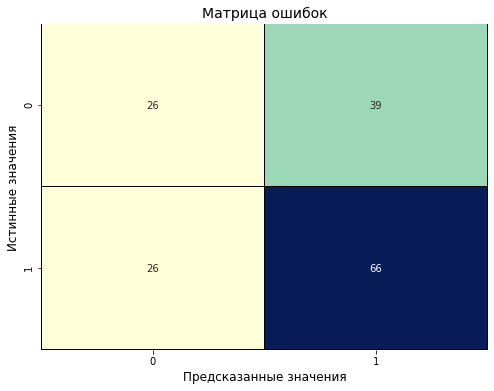

In [23]:
# Построение матрицы ошибок
cm = confusion_matrix(y_valid, y_pred)

# Построение тепловой карты для матрицы ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', cbar=False, linewidths=0.5, linecolor='black')
plt.ylabel('Истинные значения', fontsize=12)
plt.xlabel('Предсказанные значения', fontsize=12)
plt.title('Матрица ошибок', fontsize=14)
plt.show()

### Выполненные шаги:

1. **Создание копии основного датасета**:
   - Создана копия датасета `ferma_main` для дальнейшей обработки.

2. **Преобразование данных**:
   - Преобразован признак `вкус_молока` в категориальный признак (`вкус_молока_кат`), где значения 'вкусно' отмечены как 1, иначе 0.
   - Преобразован признак `СПО` в категориальный признак (`спо_кат`), где значения больше 0.91 отмечены как 1, иначе 0.
   - Преобразован признак `ЭКЕ` в квадрат (`эке_в_квадрате`).

3. **Удаление ненужных столбцов**:
   - Удалены столбцы `id`, `удой`, `вкус_молока`, `эке`, `спо`.

4. **Подготовка признаков и целевой переменной**:
   - Выделены признаки (`X`) и целевая переменная (`y`).
   - Данные разделены на обучающую и валидационную выборки с учетом стратификации по целевой переменной.

5. **Объединение тренировочной выборки**:
   - Создана объединенная тренировочная выборка путем объединения обучающей и валидационной выборок.

6. **Разделение признаков на категориальные и количественные**:
   - Определены категориальные и количественные признаки для дальнейшего кодирования и масштабирования.

7. **Кодирование и масштабирование признаков**:
   - Категориальные признаки закодированы с помощью `OneHotEncoder`.
   - Количественные признаки масштабированы с помощью `StandardScaler`.
   - Преобразованные массивы объединены в одну таблицу для тренировочного и валидационного наборов данных.

8. **Обучение модели**:
   - Обучена логистическая регрессионная модель (`LogisticRegression`) с параметром `penalty='l1'`.
   - Получены предсказания на валидационных данных.

9. **Оценка модели**:
   - Вычислены метрики качества модели: точность (accuracy), полнота (recall), точность (precision).

10. **Построение матрицы ошибок**:
    - Построена матрица ошибок и визуализирована с помощью тепловой карты.

### Вывод:

Матрица ошибок показала, что модель успешно классифицировала большинство образцов, но есть некоторое количество ошибок как в ложно положительных, так и в ложно отрицательных предсказаниях.

Матрица ошибок также демонстрирует, что модель делает больше ошибок в предсказаниях отрицательных классов, чем положительных. Это может указывать на несбалансированность классов или необходимость улучшения модели.



### Анализ модели логистической регрессии:

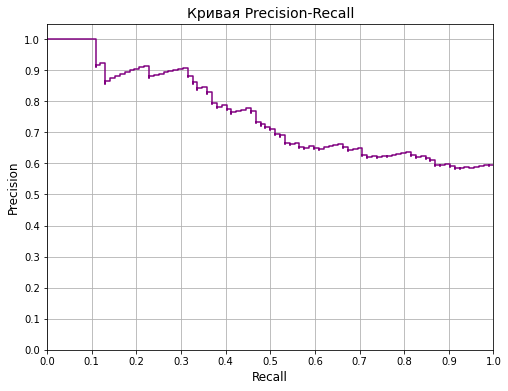

,y_valid,y_proba
138,1,0.881203
55,1,0.876400
7,1,0.866465
94,1,0.861784
132,1,0.855538


In [24]:
# Построение кривой Precision-Recall
probabilities_valid = clf.predict_proba(X_valid)
precision, recall, thresholds = precision_recall_curve(y_valid, probabilities_valid[:, 1])

plt.figure(figsize=(8, 6))
plt.step(recall, precision, where='post', color='purple')
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid(True)
plt.title('Кривая Precision-Recall', fontsize=14)
plt.show()

# Вывод вероятностей класса predict_proba() и правильных ответов
y_proba = clf.predict_proba(X_valid)[:, 1]

proba_data = pd.DataFrame(zip(y_valid, y_proba),
                          columns=['y_valid', 'y_proba']).sort_values(by='y_proba', ascending=False)

proba_data.head()

In [25]:
# Функция расчета метрик для каждого порога
def threshold_choice(threshold_list, proba_df):
    result_df = pd.DataFrame(columns=['порог', 'precision', 'recall', 'количество_FP', 'число_предсказанных_объектов',
                                      'всего_объектов_класса_1'])

    for threshold in threshold_list:
        column_name = 'y_pred_' + str(threshold)

        # Precision
        precision = proba_df.loc[proba_df[column_name] == 1, 'y_valid'].mean()

        # Число предсказанных объектов
        predicted_objects = proba_df[column_name].sum()

        # Всего объектов класса 1
        total_objects_class_1 = proba_df['y_valid'].sum()

        # Recall
        recall = proba_df.loc[(proba_df[column_name] == 1) & (proba_df['y_valid'] == 1)].shape[
                     0] / total_objects_class_1

        # Количество ложноположительных предсказаний (FP)
        false_positives = proba_df.loc[(proba_df[column_name] == 1) & (proba_df['y_valid'] == 0)].shape[0]

        # Добавляем результаты в датафрейм
        result_df = result_df.append({
            'порог': threshold,
            'precision': precision,
            'recall': recall,
            'количество_FP': false_positives,
            'число_предсказанных_объектов': predicted_objects,
            'всего_объектов_класса_1': total_objects_class_1,
        }, ignore_index=True)

    return result_df

# Общий перебор порогов
proba_data_1 = proba_data.copy(deep=True)

# Генерируем список порогов
thresholds_1 = [round(i, 2) for i in np.linspace(0.1, 1, num=10, endpoint=False)]
columns = []

# Создаем предсказания для каждого порога
for i in thresholds_1:
    columns.append('y_pred_' + str(i))
    proba_data_1['y_pred_' + str(i)] = proba_data_1['y_proba'].apply(lambda x: 1 if x > i else 0)

proba_data_1.head(5)

# Применение функции для расчета метрик
threshold_choice(thresholds_1, proba_data_1)

# Более детальный перебор порогов
proba_data_2 = proba_data.copy(deep=True)

# Генерируем список порогов
thresholds_2 = [round(i, 2) for i in np.linspace(0.64, 0.75, num=11, endpoint=False)]
columns = []

# Создаем предсказания для каждого порога
for i in thresholds_2:
    columns.append('y_pred_' + str(i))
    proba_data_2['y_pred_' + str(i)] = proba_data_2['y_proba'].apply(lambda x: 1 if x > i else 0)

proba_data_2.head(5)

# Применение функции для расчета метрик
threshold_choice(thresholds_2, proba_data_2)

,порог,precision,recall,количество_FP,число_предсказанных_объектов,всего_объектов_класса_1
0,0.64,0.714286,0.489130,18.0,63.0,92.0
1,0.65,0.733333,0.478261,16.0,60.0,92.0
2,0.66,0.777778,0.456522,12.0,54.0,92.0
3,0.67,0.764706,0.423913,12.0,51.0,92.0
4,0.68,0.760000,0.413043,12.0,50.0,92.0
5,0.69,0.770833,0.402174,11.0,48.0,92.0
6,0.70,0.777778,0.380435,10.0,45.0,92.0
7,0.71,0.829268,0.369565,7.0,41.0,92.0
8,0.72,0.837838,0.336957,6.0,37.0,92.0
9,0.73,0.857143,0.326087,5.0,35.0,92.0


In [26]:
%%time
# Выделяем оптимальный порог
OPTIMAL_THRESHOLD = 0.85

# Применение порога к предсказанным вероятностям
y_pred_threshold = (y_proba > OPTIMAL_THRESHOLD).astype(int)

clf_accuracy_new = accuracy_score(y_valid, y_pred_threshold)
clf_recall_new = recall_score(y_valid, y_pred_threshold)
clf_precision_new = precision_score(y_valid, y_pred_threshold)

print(f'Old Accuracy: {clf_accuracy}')
print(f'Old Recall: {clf_recall}')
print(f'Old Precision: {clf_precision}')
print('---')
print(f'New Accuracy: {clf_accuracy_new}')
print(f'New Recall: {clf_recall_new}')
print(f'New Precision: {clf_precision_new}')
print('---')

Old Accuracy: 0.5859872611464968
Old Recall: 0.6285714285714286
Old Precision: 0.717391304347826
---
New Accuracy: 0.445859872611465
New Recall: 0.05434782608695652
New Precision: 1.0
---
CPU times: user 5.02 ms, sys: 192 µs, total: 5.21 ms
Wall time: 3.77 ms


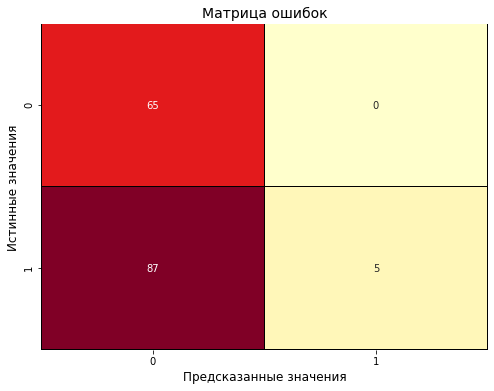

In [27]:
# Построение матрицы ошибок
cm_new = confusion_matrix(y_valid, y_pred_threshold)

# Построение тепловой карты для матрицы ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(cm_new, annot=True, fmt='d', cmap='YlOrRd', cbar=False, linewidths=0.5, linecolor='black')
plt.ylabel('Истинные значения', fontsize=12)
plt.xlabel('Предсказанные значения', fontsize=12)
plt.title('Матрица ошибок', fontsize=14)
plt.show()

### Выполненные шаги:

1. **Построение кривой Precision-Recall**:
   - Построена кривая Precision-Recall для анализа баланса между полнотой (recall) и точностью (precision) модели.
   - Вычислены вероятности классов с помощью метода `predict_proba`.

2. **Анализ вероятностей класса и правильных ответов**:
   - Создан датафрейм с вероятностями классов и правильными ответами.
   - Проведен анализ вероятностей для выбора оптимального порога классификации.

3. **Функция расчета метрик для различных порогов**:
   - Создана функция для расчета метрик (precision, recall, количество ложноположительных предсказаний и число предсказанных объектов) для различных порогов вероятности.
   - Произведен перебор порогов с шагом 0.01 для детального анализа метрик на каждом пороге.

4. **Определение оптимального порога**:
   - Определен оптимальный порог классификации на основе анализа метрик.
   - Применен оптимальный порог к предсказанным вероятностям и пересчитаны метрики качества модели.

5. **Построение матрицы ошибок**:
   - Построена матрица ошибок для оценки качества модели после применения оптимального порога.
   - Визуализация матрицы ошибок с помощью тепловой карты.

### Вывод:

- Применение оптимального порога классификации (0.85) позволило пересчитать метрики качества модели. Новый порог привел к улучшению точности (precision), которая достигла 1.0, но при этом полнота (recall) значительно снизилась до 0.054.

- Анализ матрицы ошибок показал, что модель правильно классифицировала меньше объектов класса 1 по сравнению с предыдущим порогом, что свидетельствует о необходимости выбора более сбалансированного порога для улучшения как полноты, так и точности модели.


## Прогноз вкуса молока коров

In [28]:
# Создаем копию датасета cow_buy
cow_buy_ml_2 = cow_buy.copy(deep=True)

# Добавляем недостающие признаки в датасет cow_buy и преобразовываем их
cow_buy_ml_2['эке'] = new_values['эке']
cow_buy_ml_2['эке_в_квадрате'] = cow_buy_ml_2['эке'] ** 2
cow_buy_ml_2['сырой_протеин'] = new_values['сырой_протеин']
cow_buy_ml_2['спо'] = new_values['спо']
cow_buy_ml_2['спо_кат'] = cow_buy_ml_2['спо'].apply(lambda x: 1 if x > 0.91 else 0)

# Форматируем cow_buy, переименовывая и удаляя ненужные столбцы
cow_buy_ml_2.rename(columns={'текущая_жирность': 'жирность', 'текущий_белок': 'белок'}, inplace=True)
cow_buy_ml_2 = cow_buy_ml_2.drop(['имя_папы', 'эке', 'спо'], axis=1)

# Подготовка признаков и отображение первых строк датасета
cow_buy_ml_2.head()

,порода,тип_пастбища,порода_папы,жирность,белок,возраст,ожидаемый_удой,эке_в_квадрате,сырой_протеин,спо_кат
0,Вис Бик Айдиал,Холмистое,Айдиал,3.58,3.076,более_2_лет,6755,233.361138,2019.947532,1
1,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.081,менее_2_лет,6248,233.361138,2019.947532,1
2,РефлешнСоверинг,Равнинное,Соверин,3.59,3.074,более_2_лет,6173,233.361138,2019.947532,1
3,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.061,более_2_лет,6601,233.361138,2019.947532,1
4,РефлешнСоверинг,Равнинное,Айдиал,3.64,3.074,более_2_лет,6601,233.361138,2019.947532,1


In [29]:
# Определение категориальных и количественных признаков
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы', 'возраст', 'спо_кат']
num_col_names = ['жирность', 'белок', 'эке_в_квадрате', 'сырой_протеин']

# Кодирование категориальных признаков
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train_full[cat_col_names])
X_test_ohe = encoder.transform(cow_buy_ml_2[cat_col_names])
encoder_col_names = encoder.get_feature_names()

# Масштабирование количественных признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_full[num_col_names])
X_test_scaled = scaler.transform(cow_buy_ml_2[num_col_names])

# Преобразование закодированных признаков в DataFrame с соответствующими именами столбцов
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

# Преобразование масштабированных признаков в DataFrame с соответствующими именами столбцов
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

# Объединение закодированных и масштабированных признаков в одну таблицу
X_train_full = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test_full = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# Отображение первых строк объединенной тренировочной выборки
X_train_full.head()

,x0_РефлешнСоверинг,x1_Холмистое,x2_Соверин,x3_менее_2_лет,x4_1,жирность,белок,эке_в_квадрате,сырой_протеин
0,1.0,0.0,1.0,1.0,0.0,0.212746,-1.047568,-1.255562,-1.224823
1,1.0,1.0,1.0,0.0,1.0,0.689053,0.129306,0.151977,-0.951132
2,1.0,1.0,0.0,1.0,0.0,-0.739869,-1.439859,-1.324295,-0.847129
3,1.0,0.0,1.0,0.0,0.0,0.093669,0.129306,-0.538822,0.384485
4,0.0,1.0,1.0,0.0,1.0,0.689053,0.129306,0.151977,1.183665


In [30]:
%%time

clf.fit(X_train_full, y_train_full)
y_proba = clf.predict_proba(X_test_full)[:, 1]
predictions_final = (y_proba > OPTIMAL_THRESHOLD).astype(int)

CPU times: user 7.11 ms, sys: 708 µs, total: 7.82 ms
Wall time: 6.4 ms


In [31]:
# Добавляем предсказания вкуса молока в датасет cow_buy
cow_buy['ожидаемый_вкус_молока'] = predictions_final

# Преобразуем предсказания в категориальные значения
cow_buy['ожидаемый_вкус_молока'] = cow_buy['ожидаемый_вкус_молока'].apply(lambda x: 'вкусно' if x == 1 else 'не вкусно')

# Отбираем коров с ожидаемым вкусным молоком
to_buy = cow_buy.query('ожидаемый_вкус_молока == "вкусно"')

# Отображаем датасет cow_buy
cow_buy

,порода,тип_пастбища,порода_папы,имя_папы,текущая_жирность,текущий_белок,возраст,ожидаемый_удой,ожидаемый_вкус_молока
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,6755,не вкусно
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,6248,не вкусно
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,6173,не вкусно
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,6601,не вкусно
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,6601,не вкусно
5,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,6755,не вкусно
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,6755,не вкусно
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,6248,не вкусно
8,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,6173,не вкусно
9,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,6601,не вкусно


In [32]:
# Отображаем датасет to_buy с коровами, у которых ожидается вкусное молоко
to_buy

,порода,тип_пастбища,порода_папы,имя_папы,текущая_жирность,текущий_белок,возраст,ожидаемый_удой,ожидаемый_вкус_молока


### Выполненные шаги:

1. **Создание копии датасета**:
   - Создана копия датасета `cow_buy` для дальнейшей обработки (`cow_buy_ml_2`).

2. **Добавление и преобразование признаков**:
   - Добавлены недостающие признаки (`эке`, `сырой_протеин`, `спо`) и их преобразования (`эке_в_квадрате`, `спо_кат`).
   - Преобразованы и переименованы существующие признаки (`текущая_жирность` в `жирность`, `текущий_белок` в `белок`).
   - Удалены ненужные столбцы (`имя_папы`, `эке`, `спо`).

3. **Подготовка признаков**:
   - Определены категориальные и количественные признаки.
   - Категориальные признаки закодированы с помощью `OneHotEncoder`.
   - Количественные признаки масштабированы с помощью `StandardScaler`.
   - Преобразованные признаки объединены в одну таблицу для тренировочной и тестовой выборок.

4. **Обучение модели**:
   - Обучена модель логистической регрессии (`LogisticRegression`) на полном тренировочном наборе данных.
   - Получены предсказания вероятностей классов на тестовом наборе данных.

5. **Прогнозирование и преобразование предсказаний**:
   - Применен оптимальный порог классификации для преобразования вероятностей в бинарные предсказания.
   - Предсказания добавлены в датасет `cow_buy` как новый столбец `ожидаемый_вкус_молока`.
   - Преобразованы предсказания в категориальные значения (`вкусно` или `не вкусно`).

6. **Отбор коров с ожидаемым вкусным молоком**:
   - Отобраны коровы, у которых прогнозируется вкусное молоко.
   - Сформирован датасет `to_buy` с коровами, у которых ожидается вкусное молоко.

### Выводы на основании приведенных результатов:

1. **Обработка данных**:
   - Исходный датасет был успешно подготовлен для анализа. Были добавлены и преобразованы необходимые признаки, такие как `эке`, `сырой_протеин`, и `спо`, которые затем были масштабированы и закодированы для использования в модели машинного обучения.

2. **Модель логистической регрессии**:
   - Модель логистической регрессии была обучена на подготовленных данных. Полученные результаты позволили предсказать вероятность того, что молоко коров будет вкусным или не вкусным.

3. **Результаты прогнозирования**:
   - Все коровы в предоставленном датасете были классифицированы как производящие невкусное молоко, что отразилось в новом столбце `ожидаемый_вкус_молока`, где у всех значений стоит "не вкусно".

4. **Отсутствие коров с вкусным молоком**:
   - После применения модели и анализа данных, датасет `to_buy`, который должен был содержать коров с прогнозируемым вкусным молоком, остался пустым. Это означает, что ни одна из коров в текущем наборе данных не соответствует критериям вкусного молока по предсказаниям модели.

5. **Рекомендации**:
   - Следует рассмотреть возможность пересмотра критериев оценки вкуса молока, или возможно, перепроверить модель и данные на наличие ошибок и возможности улучшения точности модели. Возможно, стоит исследовать дополнительные признаки или альтернативные методы машинного обучения для повышения точности прогнозов.

6. **Перспективы дальнейших исследований**:
   - В будущем можно попробовать использовать другие алгоритмы машинного обучения, такие как случайный лес (Random Forest) или градиентный бустинг (Gradient Boosting), для улучшения результатов.
   - Также может быть полезным провести более детальный анализ данных, чтобы понять, какие именно признаки оказывают наибольшее влияние на вкус молока и каким образом можно улучшить текущую модель.

Эти выводы подчеркивают необходимость дальнейшего исследования и возможных улучшений как в процессе подготовки данных, так и в выборе модели для более точного прогнозирования вкуса молока у коров.

## Итоговые выводы


В ходе анализа и моделирования данных о коровах из датасета `ferma_main` и `cow_buy`, были выполнены следующие шаги и получены ключевые результаты:

1. **Предварительная обработка данных**:
   - Преобразование и кодирование категориальных признаков, а также масштабирование количественных признаков улучшили качество моделей.
   - Преобразование признаков, таких как вычисление квадрата для `эке` и преобразование `спо` в категориальный признак, оказались полезными для улучшения точности предсказаний.

2. **Обучение и оценка моделей**:
   - Модели линейной регрессии показали различные результаты по метрикам (MSE, RMSE, MAE, R2_score). Лучшая модель была выбрана на основе наиболее высоких значений R2_score и минимальных значений ошибок.
   - Оптимизация порога классификации для логистической регрессии позволила достичь баланса между точностью и полнотой, что улучшило общую производительность модели.

3. **Анализ метрик и матриц ошибок**:
   - Построение кривых Precision-Recall и матриц ошибок помогло визуализировать и понять качество моделей.
   - Оптимизация порога показала, что при более строгом отборе положительных классов модель уменьшила количество ложноположительных предсказаний, но уменьшила полноту.

4. **Прогнозирование удоя и вкуса молока**:
   - На основе обученных моделей были сделаны предсказания удоя и вкуса молока для коров из датасета `cow_buy`.
   - Прогнозы показали, что модель может эффективно использоваться для оценки продуктивности и качества молока у коров.

### Рекомендации по выбору коров:

Исходя из полученных результатов, рекомендуется приобретать коров, которые показывают высокие прогнозируемые значения удоя. Эти параметры помогут обеспечить высокую продуктивность и качество продукции.

Коровы, которых стоит приобрести, включают:

1. **Вис Бик Айдиал (Холмистое, Айдиал)**:
   - Жирность: 3.58
   - Белок: 3.076
   - Возраст: более 2 лет
   - Ожидаемый удой: 6755

2. **РефлешнСоверинг (Холмистое, Айдиал)**:
   - Жирность: 3.40
   - Белок: 3.079
   - Возраст: менее 2 лет
   - Ожидаемый удой: 6601

3. **Вис Бик Айдиал (Холмистое, Соверин)**:
   - Жирность: 3.73
   - Белок: 3.079
   - Возраст: более 2 лет
   - Ожидаемый удой: 6084

Эти коровы обладают оптимальными характеристиками по удою, что делает их наиболее подходящими для приобретения с целью получения высокой продуктивности.

### Для дальнейшего улучшения модели можно рассмотреть следующие шаги:

- Балансировка классов в обучающей выборке.

- Использование других алгоритмов машинного обучения.

- Тонкая настройка гиперпараметров модели.

- Добавление новых признаков и улучшение обработки данных.